|Variable|Definition|Key|
|---|---|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|gender|gender ||
|Age |Age in years| |
|sibsp |number of siblings / spouses aboard|	|
|parch |number of parents / children aboard| |
|ticket|Ticket number ||
|fare | fare| 	|
|cabin |Cabin number|	|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|
|boat | Lifeboat||
|body | Body Identification Number||
|home.dest| Home/destination||

- Read data and describe it
- Find columns with missingdata
- Print shape of dataset
- drop columns with more than 25% missing data
- drop columns having independent values(which do not affect the survival rate).


- check data types of all columns
- convert price to numeric
- find columns still having missing/na values and also count of missing data
- fill na with mean for fare and age column column.
- drop na values for embarked column.
- dump the dataframe to a csv file 'titanic_filtered.csv'.

- for survived column replace 0 with D and 1 with A
- find the frequency of different values in survived column
- group by gender and survived and see the counts in each category
- find different pclass and no of people in each class

- find top 5 people with highest values of age. Count no of male and females in the top 5
- find max age male and female who survived
- get average age by gender
- get average age by people survived vs not-survived

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"E:\LINKS\Desktop\workspace\2019_12_09_dsc_weekend\titanic_dataset.csv")

In [3]:
print(df.head())

   Unnamed: 0  pclass  survived  \
0           0       1         1   
1           1       1         1   
2           2       1         0   
3           3       1         0   
4           4       1         0   

                                              name  gender      age  sibsp  \
0                    Allen, Miss. Elisabeth Walton  female  29.0000      0   
1                   Allison, Master. Hudson Trevor    male   0.9167      1   
2                     Allison, Miss. Helen Loraine  female   2.0000      1   
3             Allison, Mr. Hudson Joshua Creighton    male  30.0000      1   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000      1   

   parch  ticket      fare    cabin embarked boat   body  \
0      0   24160  $211.34        B5        S    2    NaN   
1      2  113781  $151.55   C22 C26        S   11    NaN   
2      2  113781  $151.55   C22 C26        S  NaN    NaN   
3      2  113781  $151.55   C22 C26        S  NaN  135.0   
4      2  113781  $1

In [13]:
df = pd.read_csv("https://github.com/tuteurpy/2019_12_09_dsc_weekend/raw/master/titanic_dataset.csv")
print(df.head(10))

   Unnamed: 0  pclass  survived  \
0           0       1         1   
1           1       1         1   
2           2       1         0   
3           3       1         0   
4           4       1         0   
5           5       1         1   
6           6       1         1   
7           7       1         0   
8           8       1         1   
9           9       1         0   

                                              name  gender      age  sibsp  \
0                    Allen, Miss. Elisabeth Walton  female  29.0000      0   
1                   Allison, Master. Hudson Trevor    male   0.9167      1   
2                     Allison, Miss. Helen Loraine  female   2.0000      1   
3             Allison, Mr. Hudson Joshua Creighton    male  30.0000      1   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000      1   
5                              Anderson, Mr. Harry    male  48.0000      0   
6                Andrews, Miss. Kornelia Theodosia  female  63.0000 

In [12]:
print(df.describe(include= 'all'))

         Unnamed: 0       pclass     survived                  name gender  \
count   1309.000000  1309.000000  1309.000000                  1309   1309   
unique          NaN          NaN          NaN                  1307      2   
top             NaN          NaN          NaN  Connolly, Miss. Kate   male   
freq            NaN          NaN          NaN                     2    843   
mean     654.000000     2.294882     0.381971                   NaN    NaN   
std      378.020061     0.837836     0.486055                   NaN    NaN   
min        0.000000     1.000000     0.000000                   NaN    NaN   
25%      327.000000     2.000000     0.000000                   NaN    NaN   
50%      654.000000     3.000000     0.000000                   NaN    NaN   
75%      981.000000     3.000000     1.000000                   NaN    NaN   
max     1308.000000     3.000000     1.000000                   NaN    NaN   

                age        sibsp        parch    ticket    fare

In [12]:
print(df.isna().any())
print()
print(df.isna().mean()*100)

Unnamed: 0    False
pclass        False
survived      False
name          False
gender        False
age            True
sibsp         False
parch         False
ticket        False
fare           True
cabin          True
embarked       True
boat           True
body           True
home.dest      True
dtype: bool

Unnamed: 0     0.000000
pclass         0.000000
survived       0.000000
name           0.000000
gender         0.000000
age           20.091673
sibsp          0.000000
parch          0.000000
ticket         0.000000
fare           0.076394
cabin         77.463713
embarked       0.152788
boat          62.872422
body          90.756303
home.dest     43.086325
dtype: float64


In [13]:
print(df.shape)

(1309, 15)


In [21]:
df_new = df.dropna(axis = 1, thresh = 1309*0.75)
print(df_new.shape, df_new.columns)
print(df.shape, df.columns)
print()

(1309, 11) Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')
(1309, 15) Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')



In [23]:
df_new.drop(columns = ['Unnamed: 0', 'name'], inplace = True)
df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,pclass,survived,gender,age,sibsp,parch,ticket,fare,embarked
0,1,1,female,29.0000,0,0,24160,$211.34,S
1,1,1,male,0.9167,1,2,113781,$151.55,S
2,1,0,female,2.0000,1,2,113781,$151.55,S
3,1,0,male,30.0000,1,2,113781,$151.55,S
4,1,0,female,25.0000,1,2,113781,$151.55,S


In [30]:
print(df_new.head())
print(df_new.isna().mean())

   pclass  survived  gender      age  sibsp  parch  ticket      fare embarked
0       1         1  female  29.0000      0      0   24160  $211.34         S
1       1         1    male   0.9167      1      2  113781  $151.55         S
2       1         0  female   2.0000      1      2  113781  $151.55         S
3       1         0    male  30.0000      1      2  113781  $151.55         S
4       1         0  female  25.0000      1      2  113781  $151.55         S
pclass      0.000000
survived    0.000000
gender      0.000000
age         0.200917
sibsp       0.000000
parch       0.000000
ticket      0.000000
fare        0.000764
embarked    0.001528
dtype: float64


In [41]:
import numpy as np
idx = np.where(df_new.age.isna())
print(idx)
df_new.drop(index =  idx[0], inplace = True)
print(df_new.shape)

df_new.dropna(axis = 0, subset = ['age'])

(array([], dtype=int64),)
(1046, 9)


In [42]:
print(df_new.dtypes)

pclass        int64
survived      int64
gender       object
age         float64
sibsp         int64
parch         int64
ticket       object
fare         object
embarked     object
dtype: object


In [53]:
#print(dir(df_new.fare.str))
col = df_new.fare.str.replace('$', '')
df_new.fare = col
#print(df_new.head())
df_new.fare = df_new.fare.astype('float', copy = False)
print(df_new.dtypes)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [58]:
df_new.fare.mean()
df_new.embarked.mode()[0]

'S'

In [59]:
print(df_new.isna().any())
df_new.fillna(value = {'fare': df_new.fare.mean(), 'embarked': df_new.embarked.mode()[0]}, inplace = True)
print(df_new.isna().any())

pclass      False
survived    False
gender      False
age         False
sibsp       False
parch       False
ticket      False
fare         True
embarked     True
dtype: bool
pclass      False
survived    False
gender      False
age         False
sibsp       False
parch       False
ticket      False
fare        False
embarked    False
dtype: bool


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [60]:
np.nan == np.nan

False

In [61]:
df_new.to_csv('titanic_filtered.csv')

In [62]:
df_new.embarked.value_counts()

S    784
C    212
Q     50
Name: embarked, dtype: int64

In [64]:
df_new.pclass.unique()

array([1, 2, 3], dtype=int64)

In [70]:
grp = df_new.groupby(['gender', 'survived'])
print(grp)
print(grp.count())
print(grp.get_group(('female',1)))

                 pclass  age  sibsp  parch  ticket  fare  embarked
gender survived                                                   
female 0             96   96     96     96      96    96        96
       1            292  292    292    292     292   292       292
male   0            523  523    523    523     523   523       523
       1            135  135    135    135     135   135       135
      pclass  survived  gender   age  sibsp  parch       ticket    fare  \
0          1         1  female  29.0      0      0        24160  211.34   
6          1         1  female  63.0      1      0        13502   77.96   
8          1         1  female  53.0      2      0        11769   51.48   
11         1         1  female  18.0      1      0     PC 17757  227.53   
12         1         1  female  24.0      0      0     PC 17477   69.30   
13         1         1  female  26.0      0      0        19877   78.85   
17         1         1  female  50.0      0      1     PC 17558  247.52  

In [77]:
df_new.sort_values(by = ['age']).tail()

,pclass,survived,gender,age,sibsp,parch,ticket,fare,embarked
135,1,0,male,71.0,0,0,PC 17754,34.65,C
9,1,0,male,71.0,0,0,PC 17609,49.50,C
1235,3,0,male,74.0,0,0,347060,7.78,S
61,1,1,female,76.0,1,0,19877,78.85,S
14,1,1,male,80.0,0,0,27042,30.00,S


In [76]:
df_new.nlargest(5, columns = ['age'])

,pclass,survived,gender,age,sibsp,parch,ticket,fare,embarked
14,1,1,male,80.0,0,0,27042,30.00,S
61,1,1,female,76.0,1,0,19877,78.85,S
1235,3,0,male,74.0,0,0,347060,7.78,S
9,1,0,male,71.0,0,0,PC 17609,49.50,C
135,1,0,male,71.0,0,0,PC 17754,34.65,C


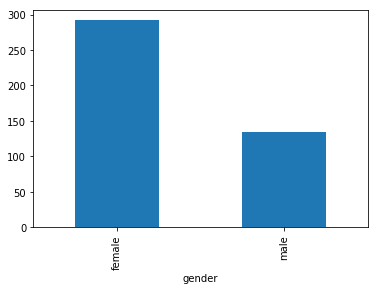

In [85]:
from matplotlib import pyplot as plt 
df_new.loc[df_new.survived == 1].groupby(by = ['gender']).age.count().plot(kind = 'bar')
plt.show()